In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

%config InlineBackend.figure_format = 'svg'

In [507]:
total_people = 10000
experiment_run = 100
people_chose = 100
score_scale = 1000
luck_weight = 5

In [508]:
def report(total_people=total_people, people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight):
    skills = [random.choice(range(0, score_scale+1)) /
              (score_scale/100) for x in range(1, total_people+1)]
    lucks = [random.choice(range(0, score_scale+1)) /
             (score_scale/100) for x in range(1, total_people+1)]
    data = {'Skill': skills, 'Luck': lucks}
    df = pd.DataFrame(data)
    df['Weighted Average'] = (
        df['Skill'] * (1-luck_weight*0.01) + df['Luck'] * (luck_weight*0.01))
    df = df.sort_values(['Weighted Average'], ascending=False)
    df = df.reset_index(drop=True)
    byskillwinners = list(df.sort_values(
        ['Skill'], ascending=False).iloc[0:people_chose].index)
    output = len([i for i in range(0, people_chose) if i in byskillwinners])
    return [output, df]


In [509]:
def experiment_loop(experiment_run=experiment_run, total_people=total_people, people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight):
    subaro_lesbians = []
    for i in range(0, experiment_run):
        subaro_lesbians.append(report(total_people=total_people, people_chose=people_chose,
                               score_scale=score_scale, luck_weight=luck_weight)[0])
    subaro_lesbians = np.array(subaro_lesbians)
    return [subaro_lesbians.mean(), (people_chose-subaro_lesbians.mean()), subaro_lesbians]


# Bias Rate

In [510]:
print(f"{experiment_loop()[0]} People were fairly chosen, {experiment_loop()[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(experiment_loop()[1]/people_chose)*100}')

51.31 People were fairly chosen, 48.04 would've lost if not for their luck
Luck Bias Rate = 47.7


# Difference between skill of winners

In [511]:
df = report()[1]
winnersbyweight = df['Skill'].iloc[:people_chose].sort_values(ascending=False).reset_index(drop=True)
winnersbyskill = df.sort_values(by=['Skill'], ascending=False).iloc[:people_chose]['Skill'].reset_index(drop=True)

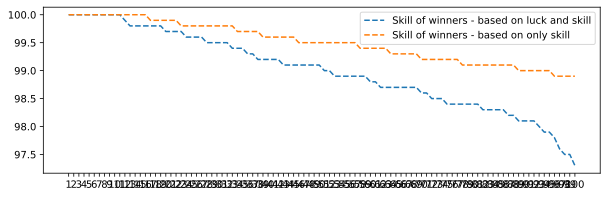

In [512]:
ax = winnersbyweight.plot(figsize=(10, 3), style='--')
ax.plot(winnersbyskill,'--')
ax.set_xticks(range(0, people_chose))
ax.set_xticklabels(range(1, people_chose+1))
ax.legend(['Skill of winners - based on luck and skill', 'Skill of winners - based on only skill'])
plt.show()

# Luck weight affect on Bias Rate

###### 1%

In [513]:
results = experiment_loop(luck_weight=1)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


86.77 People were fairly chosen, 13.230000000000004 would've lost if not for their luck
Luck Bias Rate = 13.230000000000002


###### 5%

In [514]:
results = experiment_loop(luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


52.25 People were fairly chosen, 47.75 would've lost if not for their luck
Luck Bias Rate = 47.75


###### 10%

In [515]:
results = experiment_loop(luck_weight=10)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


37.78 People were fairly chosen, 62.22 would've lost if not for their luck
Luck Bias Rate = 62.22


###### 20%

In [516]:
results = experiment_loop(luck_weight=20)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


25.65 People were fairly chosen, 74.35 would've lost if not for their luck
Luck Bias Rate = 74.35


# Winner to participant relation affect on Bias Rate
luck weight = 5%

###### 0.1 %

In [517]:
results = experiment_loop(people_chose=10, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/10)*100}')

1.77 People were fairly chosen, 8.23 would've lost if not for their luck
Luck Bias Rate = 82.30000000000001


###### 1%

In [518]:
results = experiment_loop(people_chose=100, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/100)*100}')

51.81 People were fairly chosen, 48.19 would've lost if not for their luck
Luck Bias Rate = 48.19


###### 5%

In [519]:
results = experiment_loop(people_chose=500, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/500)*100}')

434.28 People were fairly chosen, 65.72000000000003 would've lost if not for their luck
Luck Bias Rate = 13.144000000000005


###### 10%

In [520]:
results = experiment_loop(people_chose=1000, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/1000)*100}')

933.58 People were fairly chosen, 66.41999999999996 would've lost if not for their luck
Luck Bias Rate = 6.641999999999997


# Luck Bias Plot

In [521]:
def luckBiasRate(experiment_run=experiment_run, total_people=total_people, people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight):
    results = experiment_loop(experiment_run=experiment_run, total_people=total_people,
                              people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight)
    return ((results[1]/people_chose)*100)


In [522]:
luckBiasRate(luck_weight=5, people_chose=500, total_people=10000)

13.167999999999996

In [523]:
total_people = 10000
start_ratio = 1/1000
end_ratio = 1/10

people_chose = np.linspace(total_people*start_ratio, total_people*end_ratio, 5)

rates = []
for index, item in enumerate(people_chose):
    rates.append(luckBiasRate(luck_weight=5, people_chose=int(item), total_people=total_people))


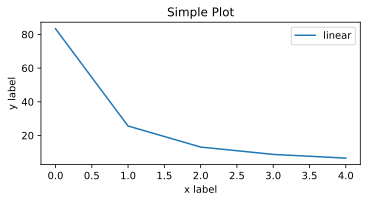

In [524]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(range(0,len(rates)), rates, label='linear')  # Plot some data on the axes.
# ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
# ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.